# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import warnings
warnings.filterwarnings('ignore')

# Data importing and exploring

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.shape

(284807, 31)

In [4]:
data = data.sample(frac = 0.2, random_state = 1)
print(data.shape)

(56961, 31)


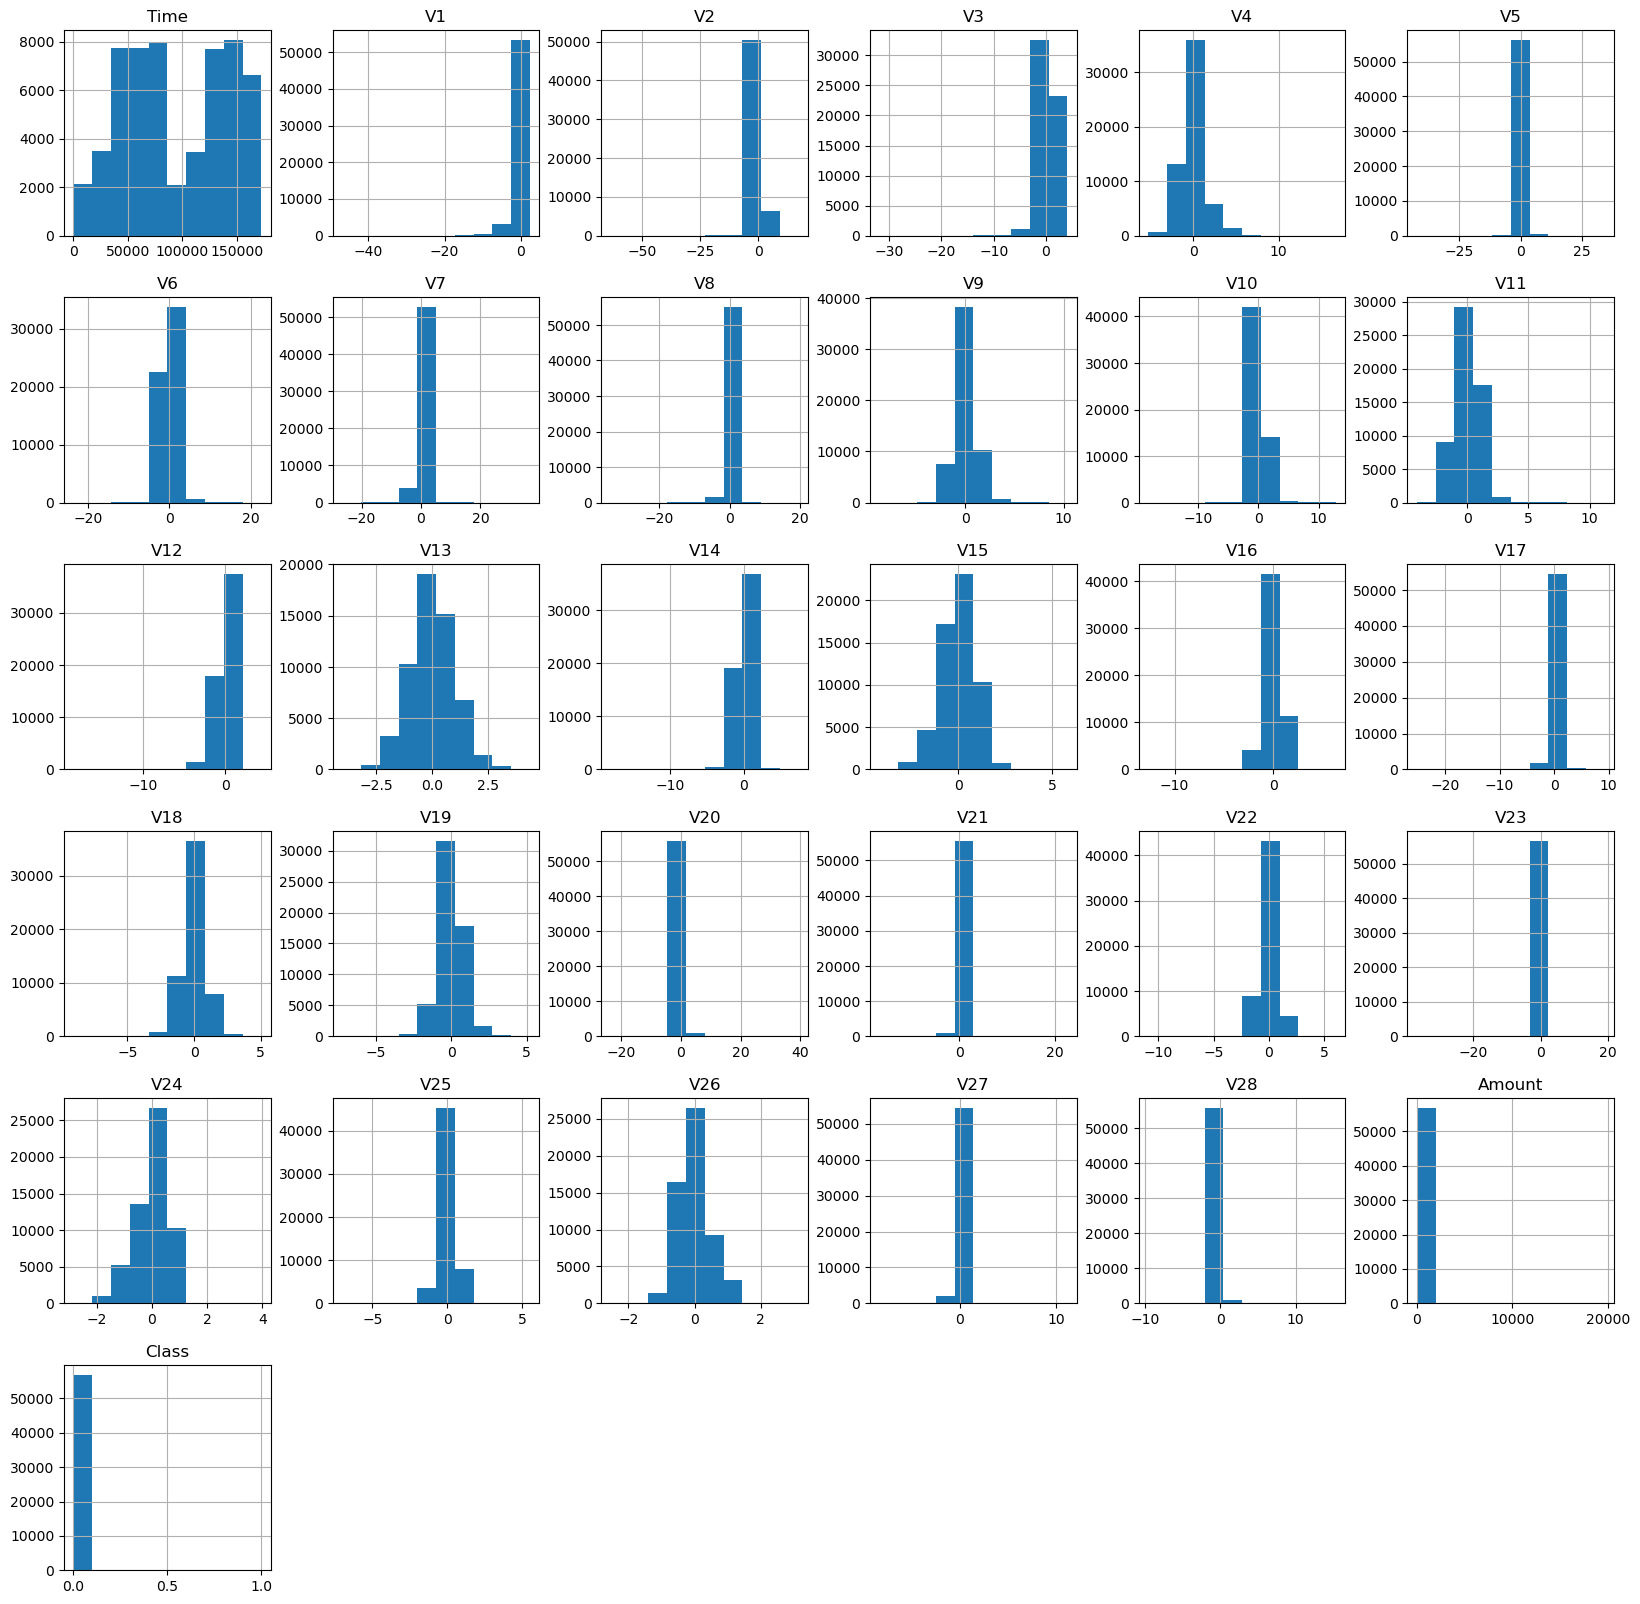

In [7]:
data.hist(figsize = (20, 20))
plt.show()

In [5]:
f = data[data['Class'] == 1]
v = data[data['Class'] == 0]

fv = len(f) / float(len(v))
print(fv)
print('Fraud: {}'.format(len(f)))
print('Valid: {}'.format(len(v)))

0.0015296972254457222
Fraud: 87
Valid: 56874


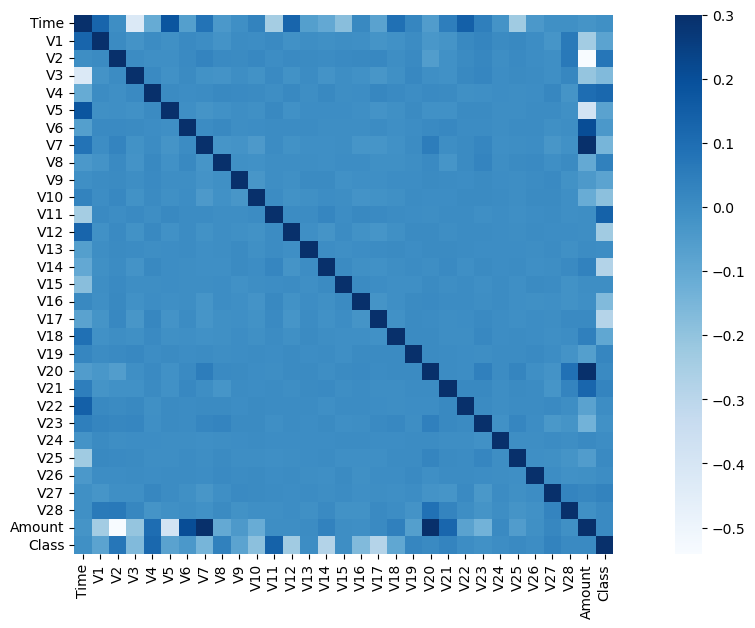

In [12]:
m = data.corr()
fig = plt.figure(figsize = (16, 7))
sns.heatmap(m, vmax = 0.3,cmap ='Blues', square = True)
plt.show()

# Data Organizing

In [6]:
col = data.columns.tolist()
col = [c for c in col if c not in ['Class']]
res = 'Class'

X = data[col]
Y = data[res]

print(X.shape)
print(Y.shape)

(56961, 30)
(56961,)


In [7]:
#Random State
rstate = 1
classifiers = {
   
    'Isolation Forest': IsolationForest(max_samples = len(X),
                                       contamination = fv,
                                       random_state = rstate),
    'Local Outlier Factor': LocalOutlierFactor(
    n_neighbors = 20,
    contamination = fv)
}

In [12]:
OutLier = len(f)
for i, (clsf_name, clsf) in enumerate(classifiers.items()):
    if clsf_name == 'Local Outlier Factor':
        y_pred = clsf.fit_predict(X)
        s_pred = clsf.negative_outlier_factor_
    else:
        clsf.fit(X)
        s_pred = clsf.decision_function(X)
        y_pred = clsf.predict(X)
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    
    print('{}:{}'.format(clsf_name, n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))

Isolation Forest:127
0.997770404311722
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.27      0.28      0.27        87

    accuracy                           1.00     56961
   macro avg       0.64      0.64      0.64     56961
weighted avg       1.00      1.00      1.00     56961

Local Outlier Factor:173
0.9969628342199048
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.01      0.01      0.01        87

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

